In [1]:
# Veri seti Acıklaması
# Veri seti Adı: Hmelq bir banka verisidir. İnsanların çeşitli niteliklere göre kredilerini ödeyip ödemedigi 
# bilgilerini tutar

#*BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

#*LOAN: The amount of the loan requested( İstenen kredi miktarı) 
#(Daha az kredi talep eden adayların gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek olmalıdır)

#*MORTDUE: How much the customer needs to pay on their mortgage(Müşterinin ipotek ödemesinde ne kadar ödeme yapması gerekiyor)
#(Daha az ipoteğe sahip olan başvuru sahiplerinin gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek) 

#*VALUE: Assessed valuation (Değerlendirilen değer, geçerli vergileri ölçmek için bir mülke atanan dolar değeridir)
#(Mevcut mülkün değeri daha düşükse, gelecekteki kredilerde temerrüde düşme olasılığı daha az olmalıdır)

#*REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemekj için alınan kredi)
#(Krediyi kullanma sebebinin temerrüde düşme şansı üzerinde de etkisi olabilir)

#*JOB: Broad job category
#*YOJ: Years on the job

#*DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)
#(Aşağılayıcı raporlar kredi geçmişinde her zaman olumsuz bir işarettir ve bu sütundaki herhangi 
 #bir sayı gelecekte yüksek varsayılan temerrüt şansını göstermelidir.)
    
#*DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
#(Bir kişi geçmişte birkaç kez temerrüde düşmüş olsaydı, temerrüt şansı daha yüksek olurdu)
#(Ödenmemiş borçların sayısı)

#*CLAGE: Age of oldest trade line (oldest tradeline= credit account)
#*NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
#*CLNO: Number of trade lines

#*DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)
#(Bir kişinin gelir konusunda yüksek borcu varsa, o kişinin daha fazla borç geri ödemesi zor olacaktır, 
#bu nedenle bu rakamdaki yüksek bir rakam temerrüte düşmesi daha fazladır)

# Dataset 

In [298]:
from google.colab import files
uploaded = files.upload()

Saving hmelq.csv to hmelq (2).csv


In [299]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from scipy import stats
from sklearn import tree
import scipy.stats as ttest_ind
import scipy.stats as shapiro
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from sklearn.metrics import roc_auc_score,roc_curve
import warnings 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
warnings.filterwarnings("ignore")

In [435]:
# Loading Data
df=pd.read_csv("hmelq.csv")
data=df.copy()
class Loading_Data:
    def __init__ (self,data):
        self.data=data
    def translate_to_dataframe(self):# dataset is converted to dataframe
        return pd.DataFrame(self.data).head()# the first 5 observations of the data set are shown
# Data Information
class Information:
    def __init__ (self,data):
        self.data=data
    def info_data(self):
        print(self.data.head())
        print(self.data.info())    
        print(self.data.dtypes)
        print(self.data.shape)
        print(self.data.columns)
    def describe_missing_values(self):
        print(self.data.isnull().values.any()) # Are there any missing observations in the dataset? If there is True; If there is no False returns
        print(self.data.isnull().sum())# Prints the number of missing observations on the basis of variables
    def select_dtypes_numeric(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])# numeric variables are selected
        print(df_numeric)
    def describe_data(self):# summary statistics information of numeric variables are accessed
        df_numeric=self.data.select_dtypes(include=['float64','int64'])# numeric variables are selected
        print(self.data.describe().T)
    def select_dtypes_category(self):
        df_category=self.data.select_dtypes(include=["object"])# categorical variables are selected
        print(df_category)
        for i in df_category.columns:
            print(self.data[i].value_counts()) # Prints the frequency information of categorical variables
    def data_cor(self):
        print(self.data.corr())
    def print_shape(self):
      print("X_train shape",X_train.shape)
      print("y_train shape",y_train.shape)
      print("X_test shape",X_test.shape)
      print("y_test shape ",y_test.shape)

# Exploratory Data Analysis (EDA)
class Visualizer:
    def __init__(self,data):
        self.data=data
    def msno_bar(self):
        plt.figure(figsize=(6,5))
        msno_bar = msno.bar(self.data,color='lightblue')
        return msno_bar
    def heat_map(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        f,ax = plt.subplots(figsize=(200,200))
        return sns.heatmap(df_numeric.corr(), annot=True, linewidths=.8, fmt='.8f', ax=ax)
    def bar_plot(self,x=None,y=None,z = None):# Used to visualize barplot categorical variables
        plt.figure(figsize=(6,5))
        sns.barplot(x=x, y=y, hue=z, data=self.data)
    def box_plot(self,x=None,y=None,z=None): # continuous variables are visualized with the help of cartridges
        numeric_features=[x for x in data.columns if data[x].dtype!="object"]
        for i in data[numeric_features].columns:
            plt.figure(figsize=(6,5))
            plt.title(i)
            sns.boxplot(data=data[i])
    def hist_plot(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            plt.figure()
            plt.hist(df_numeric[i],bins=100,color="orange")
            plt.title("Histogram of "+ i)
    def plot_tree(self,model_name=None):
      fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,6), dpi=500)
      tree.plot_tree(model_name,filled = True);
      text_representation = tree.export_text(model_name)
      print(text_representation)
    def dist_plot(self,x=None,y=None,z=None):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        df_numeric=df_numeric.dropna()
        for i in  df_numeric.columns:
            plt.figure()
            sns.distplot(np.array(df_numeric[i]),hist=False,kde=True,color="g")
            plt.title("Distplot  of "+ i)
    def reg_plot(self):
        plt.figure(figsize=(16, 7))
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i, column in enumerate(df_numeric.select_dtypes(exclude=['object']).columns[1:], 1):
            plt.subplot(2, 5, i)
            randNorm = np.random.normal(np.mean(df_numeric[column]), np.std(df_numeric[column]), len(df_numeric[column]))
            sns.regplot(np.sort(randNorm), np.sort(df_numeric[column]))
            plt.xlabel(f'{column}')
    def count_plot(self,x=None,y=None,z=None):
        plt.figure(figsize=(6,5))
        sns.countplot(x=x, y=y, hue=z, data=self.data)
    def correlation(self):
        fig,ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(data.corr(), ax=ax, annot=True, 
        linewidths=0.05, fmt= '.2f',cmap="Blues")
        plt.show()
    def scatter_plot(self,x=None,y=None,z=None):
        return sns.scatterplot(x=x,y=y,data=self.data)
    def lm_plot(self,x=None,y=None,z=None,w=None,r=None):
        return sns.lmplot(x=x, y=y, hue=z,col=w,row=r, data=self.data)
    def swarm_plot(self,x=None,y=None,z=None):
        return sns.swarmplot(x=x, y=y,hue=z, data=self.data)
    def line_plot(self,x=None,y=None,z=None):
        return sns.lineplot(x=x,y=y,hue=z,data=self.data)
    def pair_plot(self,x=None,y=None,z=None,w=None):
        return sns.pairplot(self.data,hue=z)
    def cross_tab(self,x=None,y=None,n=None):
        numeric_features=[x for x in data.columns if data[x].dtype!="object"]
        for i in numeric_features.columns:
            return pd.crosstab(self.data[i],self.data[i],normalize=n).style.background_gradient(cmap="summer_r")
    def plot_roc_curve(self,model_adı=None,X_test=None):
      auc=roc_auc_score(y_test,model_adı.predict(X_test))
      fpr,tpr,threshold=roc_curve(y_test,model_adı.predict_proba(X_test)[:,1])
      plt.figure()
      plt.plot(fpr,tpr,label='AUC( area =%0.2f)' % auc)
      plt.plot([0,1],[0,1],'r--')
      plt.xlim([0.0,1.0])
      plt.ylim([0.0,1.05])
      plt.xlabel('False Positive Oranı')
      plt.ylabel('True Positive Oranı')
      plt.title('ROC')
      plt.show()  
    def degisken_onem_görsellestirme(self,model_name=None,X_train=None):
      Importance=pd.DataFrame({"Importance":model_name.feature_importances_*100},index=X_train.columns)
      Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r")
      plt.xlabel("Degiskenlerin Önem Düzeyleri")
# Performing Hypothesis Testing
class HypothesisTesting:
    def __init__(self,data):
        self.data=data
    def normality_assumption(self):# normality assumption is realized by shapiro wilks test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
                df_new = df_numeric.dropna(subset=[i])
                stat, p = stats.shapiro(df_new[i])
                print("Statistics:%3.3f, p=%.3f " % (stat,p))
                alpha = 0.05
                if p>alpha:
                    print(i," için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
                else:
                    print(i," için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")
        print("*****************************************************************************************")
    def assumption_of_variance_homogeneity(self,variable=None,x=None,y=None):#assumption of variance homogeneity is realized by levene test
        grps=pd.unique(data[variable].values)
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            for j in grps:
                df_new = data.dropna(subset=[i])
                stat, p = stats.levene(df_new[i][data[variable]==x],df_new[i][data[variable]==y])
                print("Statistics:%3.3f, p=%.3f " % (stat,p))
                alpha = 0.05
                if p>alpha:
                    print(i,j," için varyans homojendir. (Fail to Reject H0)")
                else:
                    print(i,j," için varyans homojen degildir. (reject H0)")
        print("*****************************************************************************************")
    # numeri amaç değişkeni - kategorik bagımsız değişken 2 sınıflı : paired t test
    # numeri amaç değişkeni - kategorik bagımsız değişken 2 den fazla sınıflı : anova
    def two_independent_samples_t_test(self,variable=None,x=None,y=None):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            df_new= self.data.dropna(subset=[i])
            A=df_new[df_new[variable]==x][i]
            B=df_new[df_new[variable]==y][i]
            t, p = stats.ttest_ind(A, B, equal_var=False)
            print("ttest_ind: i=%s t = %g  p = %g" % (i,t, p))
            alpha = 0.05
            if p>alpha:
                print(i,"ile", variable," değişkeni arasında istatistiksel olarak anlamlı bir fark vardır.(Fail to Reject H0)")
            else:
                print(i," ile ", variable," değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)")
        print("*****************************************************************************************")
    # kategorik amaç değişkeni- kategorik bağımsız değişken : ki- kare bağımsızlık testi(chi-square)
    def chi_square_t_test(self,x=None,y=None):
        data_cross_tab=pd.crosstab(index=data[x],columns=data[y])
        chi2,p,dof,expected=stats.chi2_contingency(data_cross_tab)
        results=[["Item","Value"],
                 ["Chi-Square Test",chi2],
                 ["p - value",p]]
        print("Chi-Square Test =%g p=%g" %(chi2,p))
        alpha = 0.05
        if p>alpha:
            print(x,"ve",y," degiskenleri birbirinden bağımsızdır.(Fail to Reject H0)")
        else:
            print(x,"ve",y," degiskenleri birbirinden bağımsız değildir(reject H0)")
        print("*****************************************************************************************")
    def spearmanr_test(self,x=None):#  Korelasyon Anlamlılığı Testi için Spearman Testini kullanıcaz.---nonparametrik bir test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            test_istatistigi,pvalue=stats.spearmanr(self.data[x],self.data[i])
            print('Korelasyon Katsayısı= %.4f, p- degeri=%.4f' % (test_istatistigi,pvalue))
            alpha=0.05
            if pvalue >alpha:
                print('Degiskenler arasında anlamlı bir fark yoktur, (Fail to reject)')
            else:
                print('Degiskenler arasında anlamlı bir fark vardır, (Reject)')
        print("*****************************************************************************************")

    #numeric amaç değişkeni- numeric bağımsız değişken : korelasyon analizi ve ilgili anlamlılık testi
    def pearsonr_test(self,x=None):#Korelasyon analizini pearsonr ile de gerçekleştirdim--parametrik test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            test_istatistigi,pvalue=pearsonr(self.data[x],self.data[i])
            print('Korelasyon Katsayısı= %.4f, p- degeri=%.4f' % (test_istatistigi,pvalue))
            alpha=0.05
            if pvalue >alpha:
                print('Degiskenler arasında anlamlı bir fark yoktur, (Fail to reject)')
            else:
                print('Degiiskenler arasında anlamlı bir fark vardır, (Reject)')
        print("*****************************************************************************************")
# Data Preprocessing
class PreprocessStrategy:
    def __init__(self,data):
        self.data=data
    def fill_missing_value(self,data=None):
        data=self.data.dropna()
        return data.head()
    def drop_feature(self,x=None,y=None,z=None,data=None):
        X_ = self.data.drop([x, y, z],axis=1)
        return X_
    def select_feature(self,x=None):
      y = self.data[x]
      return y
    def data_concat(self,x=None,y=None,z=None,a=None,b=None,c=None):
      X = pd.concat([X_, dms[[x,y,z,a,b,c]]], axis = 1)
      return X
    def dataset_split(self,X=None,y=None,test_size=None,random_state=None):
      X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=test_size,random_state=random_state)
      print("X_train shape :",X_train.shape)
      print("X_test shape :", X_test.shape)
      print("y_train shape: ",y_train.shape)
      print("y_test shape :" ,y_test.shape)
      return X_train,X_test,y_train,y_test
    def replace_nan(self,x=None):
        return self.data.replace(x,np.nan,inplace=True)
    def fill_missing_specific_variable_with_median(self,X=None):#filling missing observations specific to the variable
        return self.data[X].fillna(self.data[X].median(),inplace=True)
    def fill_missing_value_with_mean(self):#fill in missing values in all variables with mean
        return self.data.apply(lambda x: x.fillna(x.mean()),axis=0)
    def fill_missing_value_with_median(self):#fill in missing values in all variables with median
        return self.data.apply(lambda x: x.fillna(x.median()),axis=0)
    def normalization(self):# converts variable values from 0 to 1
        return preprocessing.normalize(self.data)
    def one_hot_dummy_variable(self,x=None,y=None):#It can be used to convert categorical variable to continuous variable. As a result, awareness among classes will be preserved.
        df_one_hot=self.data.copy()
        dms = pd.get_dummies(df_one_hot[[x, y]])
        return dms
    def label_encoder(self,new_variable_name=None,categorical_variable_to_converted=None):# Performs conversions by the number of classes available
        lbe=preprocessing.LabelEncoder()
        data[new_variable_name]=lbe.fit_transform(data[categorical_variable_to_converted])
        return data[new_variable_name]
    def standardization(self):#a standardization is performed with an average of 0 standard deviations of one
        df_standardization=preprocessing.scale(self.data)
        return df_standardization
    def min_max_transformation(self,x=None,y=None):#Used to convert the values of a variable between two ranges that we want
        scaler=preprocessing.MinMaxScaler(feature_range=(x,y))
        return scaler.fit_transform(self.data)
    def discarding_pvalue(self,X_train=None,X_test=None):
      X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
      X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]
      return X_train,X_test
    def binarize_transformation(self,threshold=None):#Converts the variable's values to 0 or 1 according to a certain threshold value
        binarizer=preprocessing.Binarizer(threshold=threshold).fit(self.data)
        return binarizer.transform(self.data)
  
        
# Data Modelling ,Performance/Evaluation metrics of the models
class GridSearchHelper():# model fit, model predict and model results are performed in this section
    def __init__(self,data):
        self.data=data
    def linear_regresyon(self,X_train=None,X_test=None,y_test=None,y_train=None):
        #X= df[[x]]# x independent variable
        #y=df[[y]] # y dependent variable 
        lm=LinearRegression()
        linear_model=lm.fit(X_train,y_train)# model object created
        return linear_model
    def pca(self,X_train=None,X_test=None,y_test=None,y_train=None):
        pca =PCA()
        X_reduced_test= pca.fit_transform(scale(X_test))
        print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:5])
        lm=LinearRegression()
        y_train=y_train.fillna(y_train.mean())
        pca_model=lm.fit(X_reduced_test,y_train)
        return pca_model
    def logistic_regresyon(self,X_train=None,y_train=None,solver=None):
        loj=LogisticRegression(solver=solver)
        loj_model=loj.fit(X_train,y_train)
        return loj_model
    def loj_summary(self,X_train=None,y_train=None):
      loj = sm.Logit(y_train, X_train)
      loj_model = loj.fit()
      print(loj_model.summary())
    def decision_tree(self,X_train=None,y_train=None):
      cart=DecisionTreeClassifier()
      cart_model=cart.fit(X_train,y_train)
      print(cart_model)
      return cart_model
    def random_forest(self,X_train=None,y_train=None):
      rf=RandomForestClassifier()
      rf_model=rf.fit(X_train,y_train)
      print(rf_model)
      return rf_model
    def decision_tree_model_tuning(self,X_train=None,y_train=None):
      decision_tree_classifier_grid={"max_depth": range(1,10),"criterion":["gini","entropy"],"min_samples_split":list(range(2,15))}
      cart=tree.DecisionTreeClassifier()
      cart_cv=GridSearchCV(cart,decision_tree_classifier_grid,cv=10,n_jobs=-1,verbose=2)
      cart_cv_model=cart_cv.fit(X_train,y_train)
      cart_classifier=tree.DecisionTreeClassifier(max_depth=cart_cv_model.best_params_["max_depth"],min_samples_split=cart_cv_model.best_params_["min_samples_split"],criterion=cart_cv_model.best_params_["criterion"])
      cart_tuned=cart_classifier.fit(X_train,y_train)
      print(cart_tuned)
      return cart_tuned
    def random_forest_model_tuning(self,X_train=None,y_train=None):
      rf_params={"max_depth":[3,5,8],"max_features":[0.1,0.25,0.5],"n_estimators":[200,500,1000],"min_samples_split":[5,10]}# göz öünde bulunacak olan degsken sayısı
      rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
      rf_cv_model.fit(X_train,y_train)
      rf_tuned=RandomForestClassifier(max_depth=rf_cv_model.best_params_["max_depth"],max_features=rf_cv_model.best_params_["max_features"],min_samples_split= rf_cv_model.best_params_["min_samples_split"],n_estimators= rf_cv_model.best_params_["n_estimators"])
      rf_tuned=rf_tuned.fit(X_train,y_train)
      print(rf_tuned)
      return rf_tuned
    def neural_network(self,X_train=None,y_train=None):
      mlpc=MLPClassifier()
      mlpc_model=mlpc.fit(X_train_scaled,y_train)
      print(mlpc_model)
      return mlpc_model
    def neural_network_model_tuning(self,X_train=None,y_train=None):
      mlpc_params={"alpha":[0.1,0.01,0.02],
                   "hidden_layer_sizes":[(100,100,100),(100,100),(3,5),(5,3)],"solver":["adam","sgd"],"activation":["relu","logistic"]}#activation function
      mlpc=MLPClassifier()
      mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2)
      mlpc_cv_model.fit(X_train_scaled,y_train)
      mlpc_tuned=MLPClassifier(alpha=mlpc_cv_model.best_params_["alpha"],
                        hidden_layer_sizes=mlpc_cv_model.best_params_["hidden_layer_sizes"],
                        solver=mlpc_cv_model.best_params_["solver"],
                        activation=mlpc_cv_model.best_params_["activation"])
      mlpc_tuned=mlpc_tuned.fit(X_train_scaled,y_train)
      print(mlpc_tuned)
      return mlpc_tuned

    def support_vektor_machine(self,X_train=None,y_train=None):
      svm=SVC()
      svm_model=svm.fit(X_train,y_train)
      print(svm_model)
      return svm_model
    def svc_model_tuning(self,X_train=None,y_train=None):
      svc_params={"C":np.arange(2,5),"kernel":["linear","rbf"]}
      svc=SVC()
      svc_cv_model=GridSearchCV(svc,svc_params,cv=10,n_jobs=-1,verbose=2)
      svc_cv_model.fit(X_train,y_train)
      svc_tuned=SVC(kernel=svc_cv_model.best_params_["kernel"],C=svc_cv_model.best_params_["C"]).fit(X_train,y_train)
      print(svc_tuned)
      return svc_tuned
    def gaussian_naive_bayes(self,X_train=None,y_train=None):
      naive_bayes=GaussianNB()
      nb_model=naive_bayes.fit(X_train,y_train)
      print(nb_model)
      return nb_model
    def multinominal_naive_bayes(self,X_train=None,y_train=None):
      mnb = MultinomialNB()
      mnb_model = mnb.fit(X_train, y_train)
      print(mnb_model)
      return mnb_model
    def XGBoost(self,X_train=None,y_train=None):
      xgb_model=XGBClassifier()
      xgb_model.fit(X_train,y_train)
      print(xgb_model)
      return xgb_model
    def xgb_model_tuning(self,X_train,y_train):
      xgb_params={"n_estimators":[100,500,1000,2000],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_samples_split":[2,5,10]}
           xgb=XGBClassifier()
           xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)
           xgb_cv_model.fit(X_train,y_train)
           xgb=XGBClassifier(n_estimators=xgb_cv_model.best_params_["n_estimators"],subsample=xgb_cv_model.best_params_["subsample"],max_depth=xgb_cv_model.best_params_["max_depth"],learning_rate=xgb_cv_model.best_params_["learning_rate"],min_samples_split=xgb_cv_model.best_params_["min_samples_split"])
           xgb_tuned=xgb.fit(X_train,y_train)
           print(xgb_tuned)
           return xgb_tuned
    def knn(self,X_train=None,y_train=None):
      knn=KNeighborsClassifier()
      knn_model=knn.fit(X_train,y_train)
      print(knn_model)
      return knn_model
    def knn_model_tuning(self,X_train=None,y_train=None):
      knn_params={"n_neighbors":np.arange(2,40),"metric":["minkowski","euclidean","manhattan"]}
      knn=KNeighborsClassifier()
      knn_cv= GridSearchCV(knn,knn_params,cv=10)
      knn_cv.fit(X_train,y_train)
      knn_tuned=KNeighborsClassifier(n_neighbors=knn_cv.best_params_["n_neighbors"],metric=knn_cv.best_params_["metric"])
      knn_tuned.fit(X_train,y_train)
      print(knn_tuned)
      return knn_tuned
    def coefficiant(self,model_name=None):
      print("Sabit katsayı: ",loj_model.intercept_)# sabit katsayı
      print("katsayılar :",loj_model.coef_)# katsayılar
    def fit_predict_and_show_result(self,model_name=None,X_test=None):
      y_pred=model_name.predict(X_test)
      print("Classification Report",classification_report(y_test, y_pred))
      print("Accuracy Score ",accuracy_score(y_test, y_pred))
      print("roc_auc",roc_auc_score(y_test,model_name.predict(X_test)))


In [301]:
data=pd.read_csv("hmelq.csv")
loading_result=Loading_Data(data)
loading_result.translate_to_dataframe()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [302]:
data_information=Information(data)
data_information.info_data()
data_information.describe_missing_values()
data_information.select_dtypes_numeric()
data_information.describe_data()
data_information.select_dtypes_category()

   bad   loan   mortdue     value   reason  ... delinq   clage  ninq  clno  debtinc
0    0  81200   18834.0  108355.0  HomeImp  ...    0.0  139.14   0.0  14.0   34.042
1    0  12600  103960.0  127384.0  DebtCon  ...    0.0  129.02   0.0  25.0   34.479
2    0  18000   46865.0   61266.0  DebtCon  ...    0.0  102.59   2.0   9.0   26.354
3    0  10300   57676.0   71027.0  DebtCon  ...    0.0  157.52   1.0  11.0   33.992
4    0   9400   56508.0   78358.0  DebtCon  ...    0.0  141.93   0.0  11.0   32.327

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-n

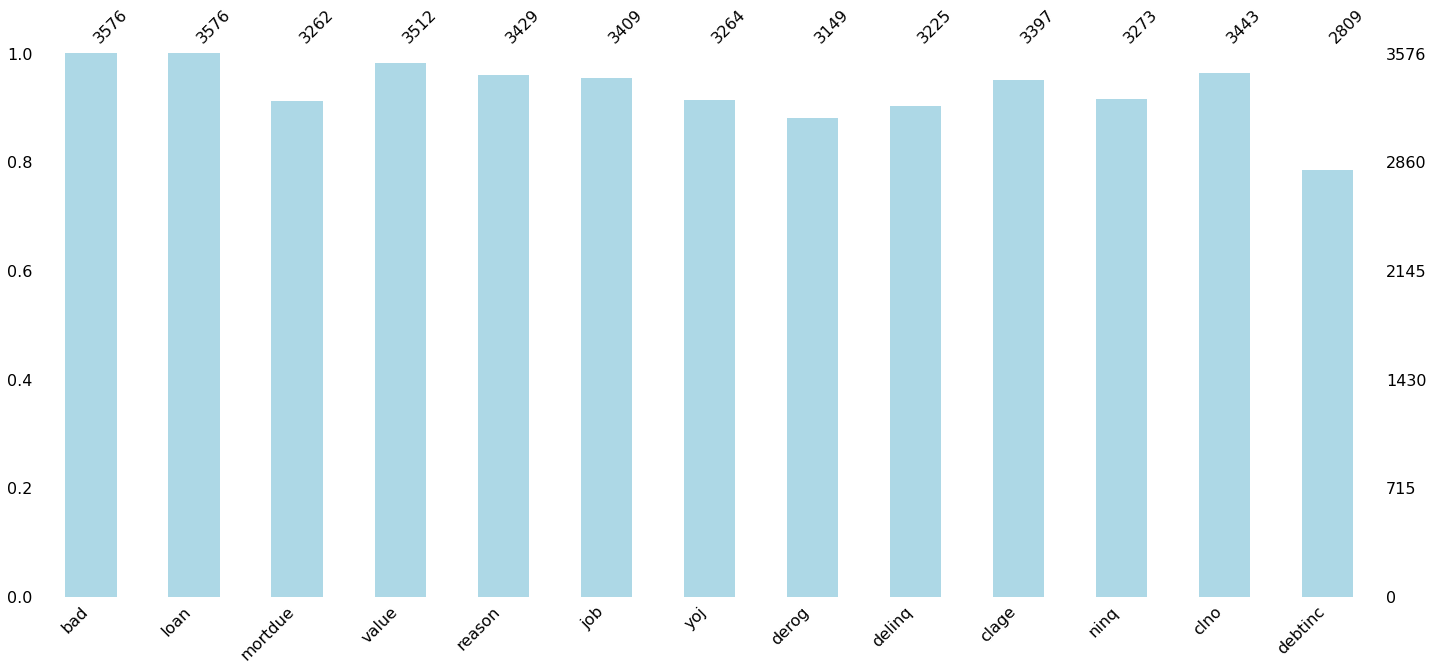

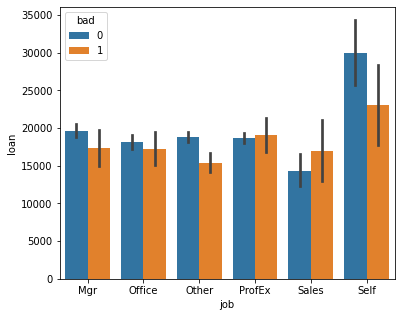

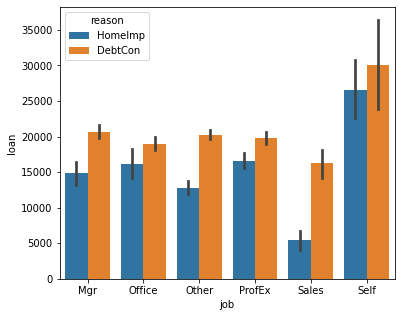

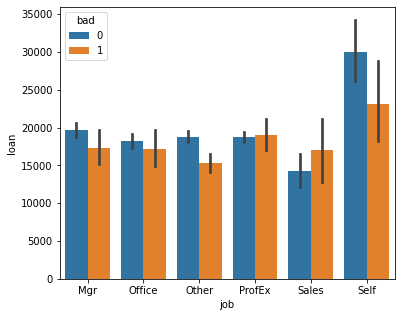

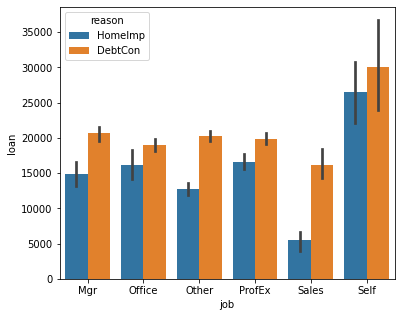

In [303]:
data_visualization=Visualizer(data)
data_visualization.msno_bar()
data_visualization.bar_plot(x="job",y="loan",z="bad")
data_visualization.bar_plot(x="job",y="loan",z="reason")
data_visualization.bar_plot(x="job",y="loan",z="bad")
data_visualization.bar_plot(x="job",y="loan",z="reason")

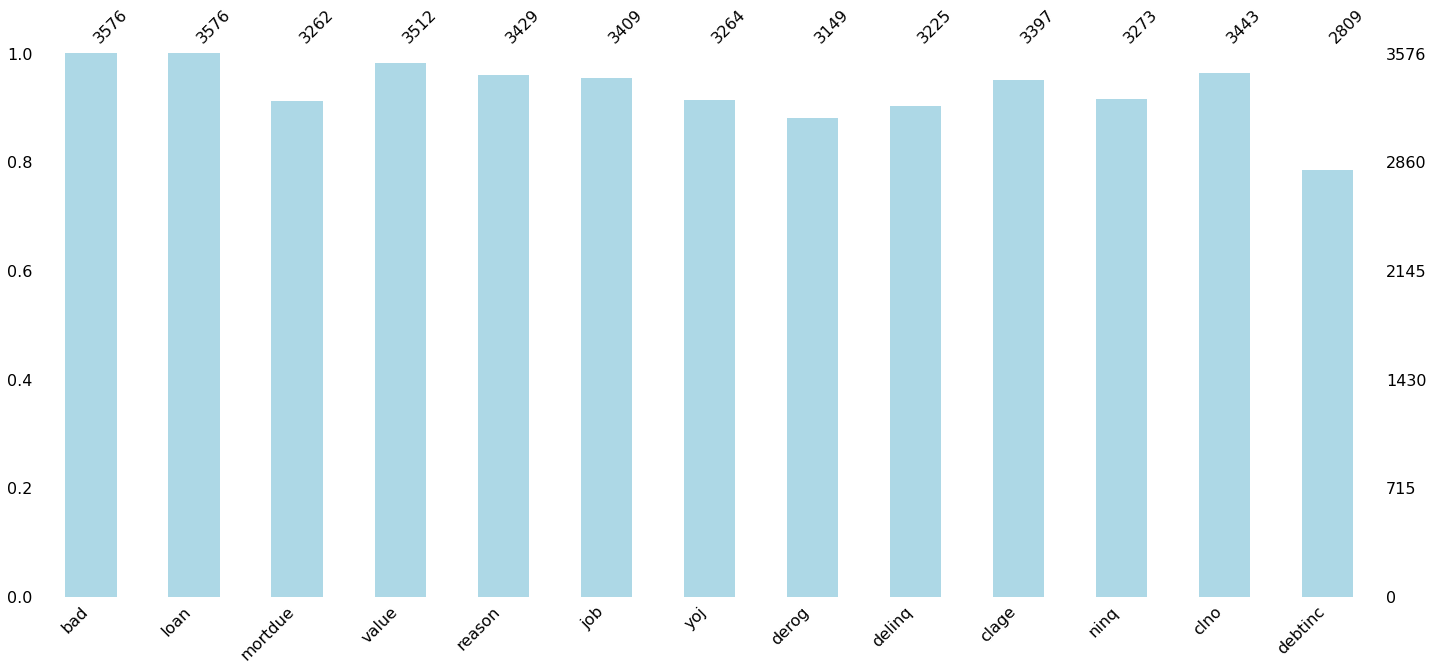

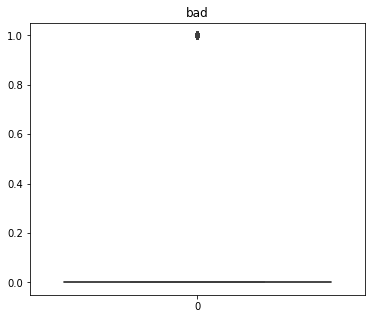

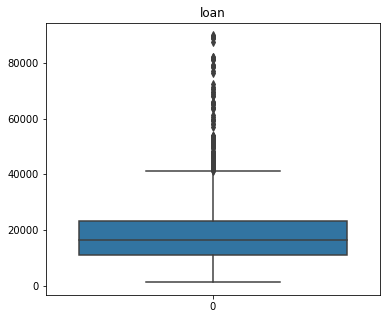

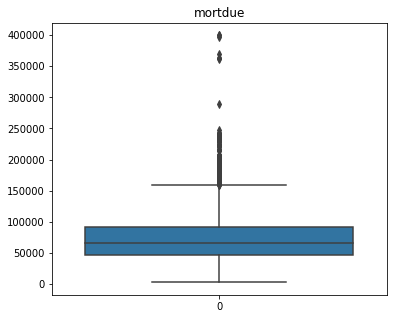

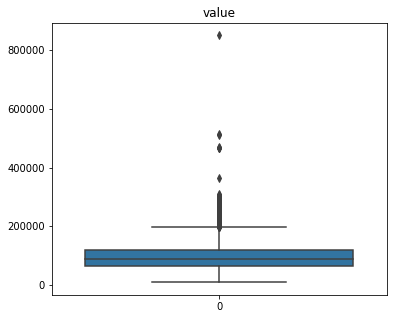

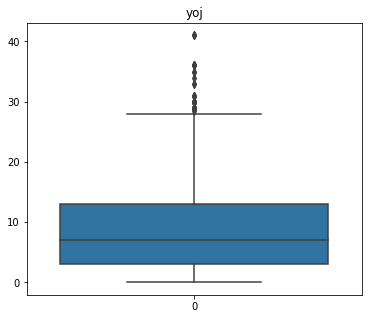

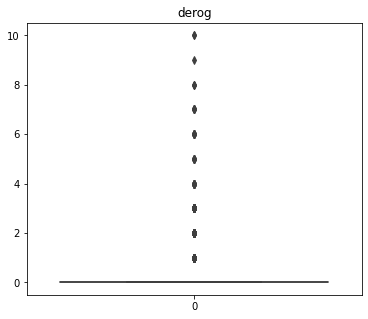

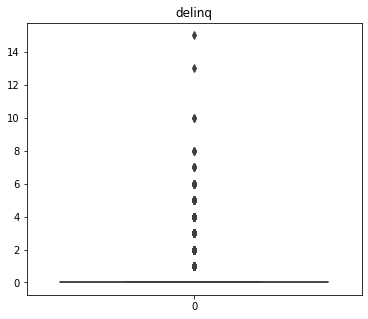

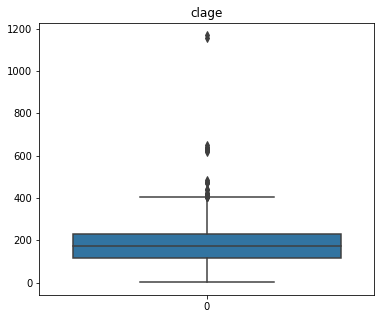

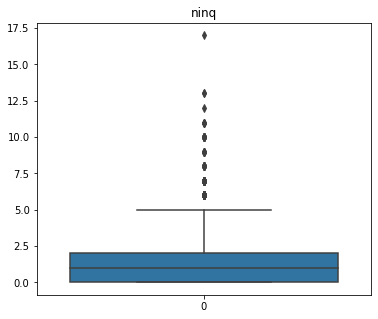

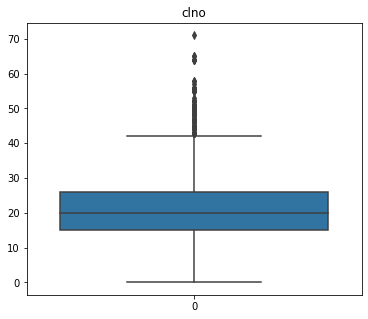

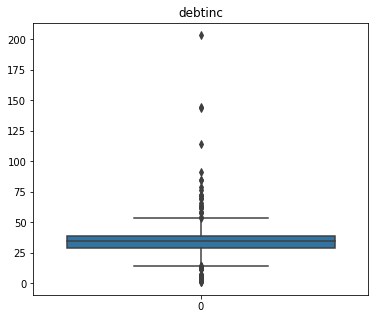

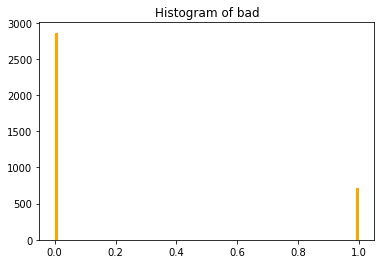

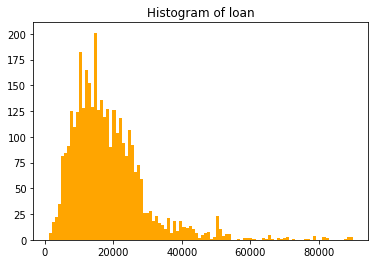

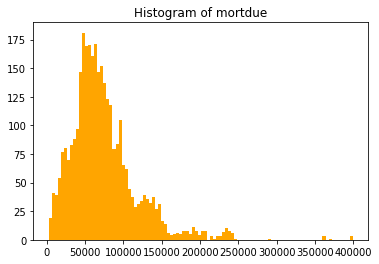

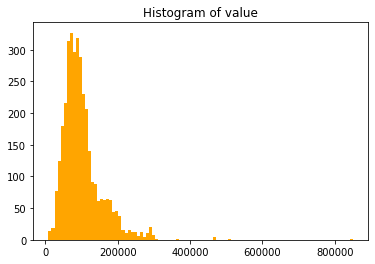

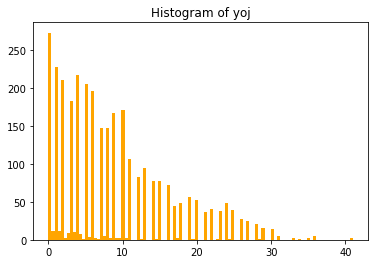

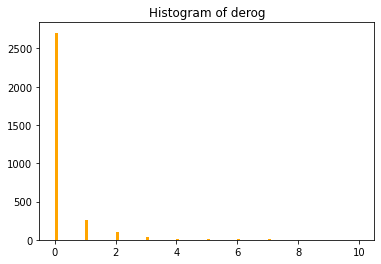

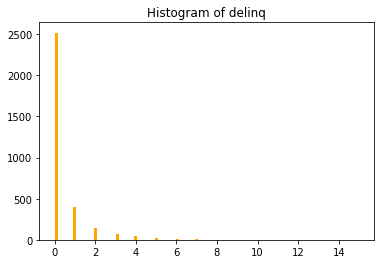

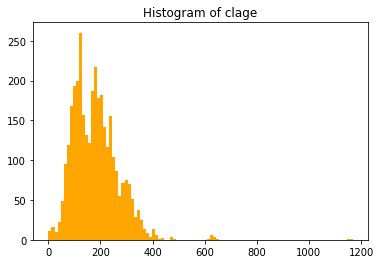

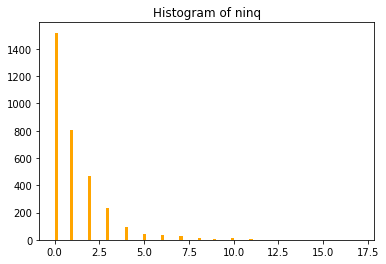

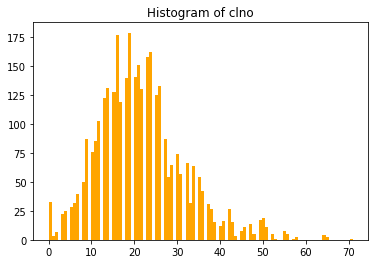

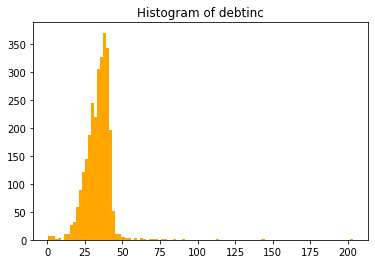

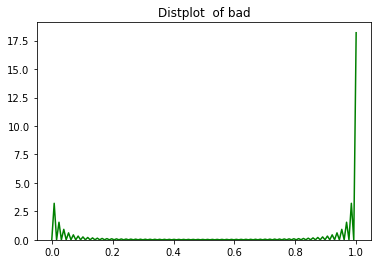

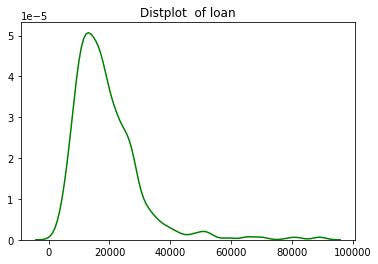

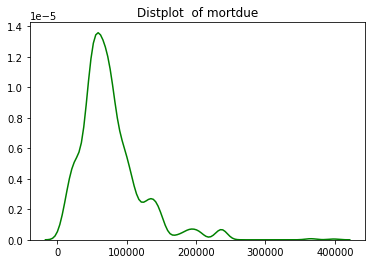

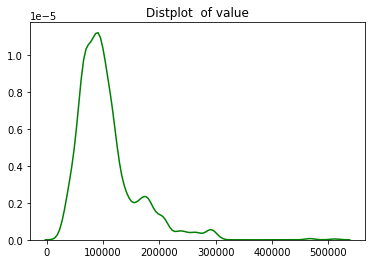

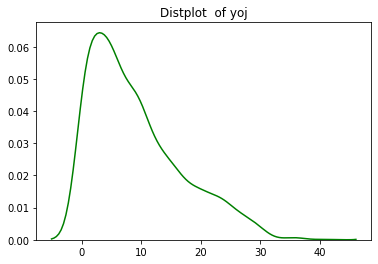

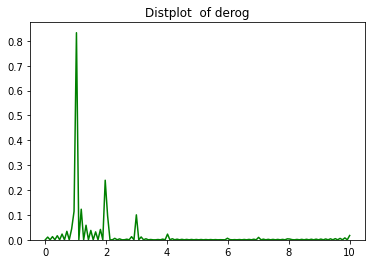

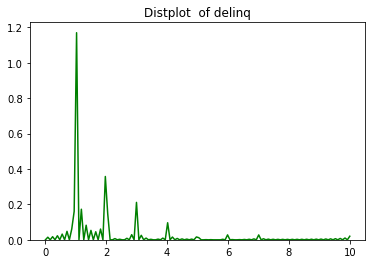

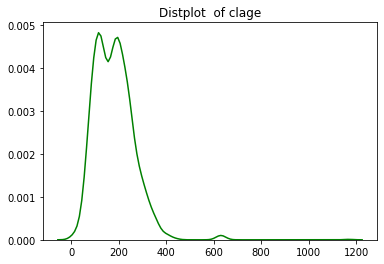

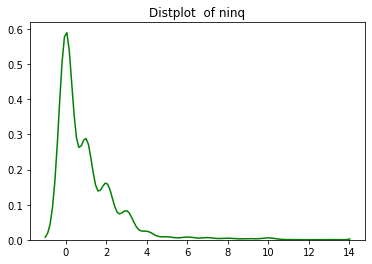

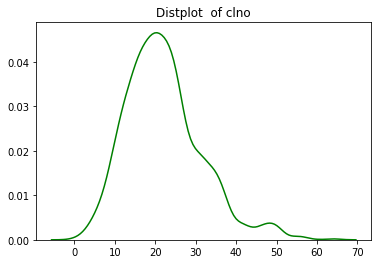

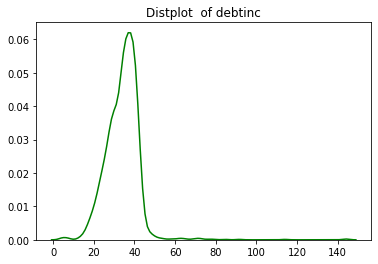

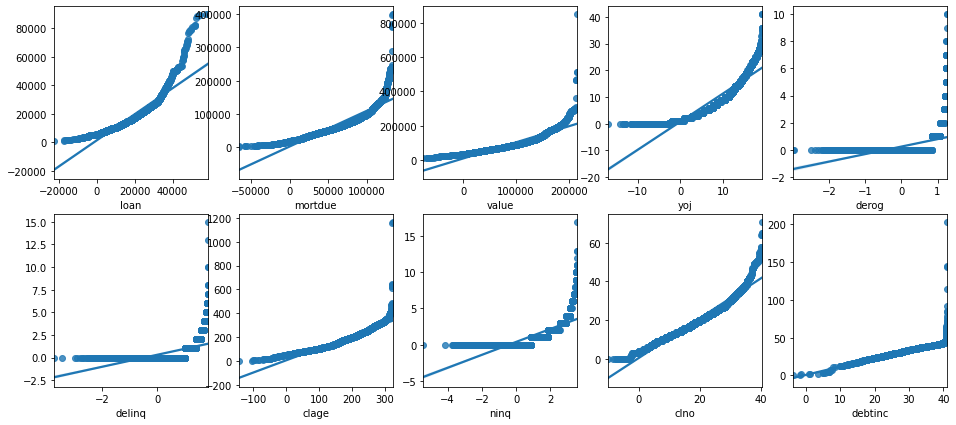

In [304]:
data_visualization=Visualizer(data)
data_visualization.msno_bar()

data_visualization.box_plot()
data_visualization.hist_plot()
data_visualization.dist_plot()
data_visualization.reg_plot()

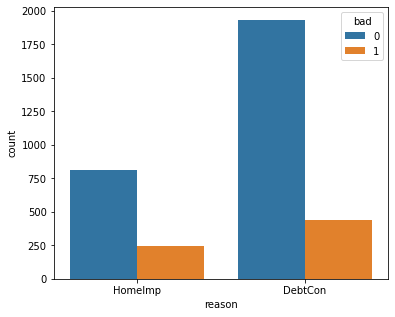

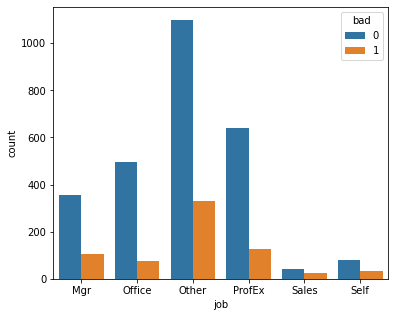

In [305]:
data_visualization.count_plot(x="reason",z="bad")
data_visualization.count_plot(x="job",z="bad")

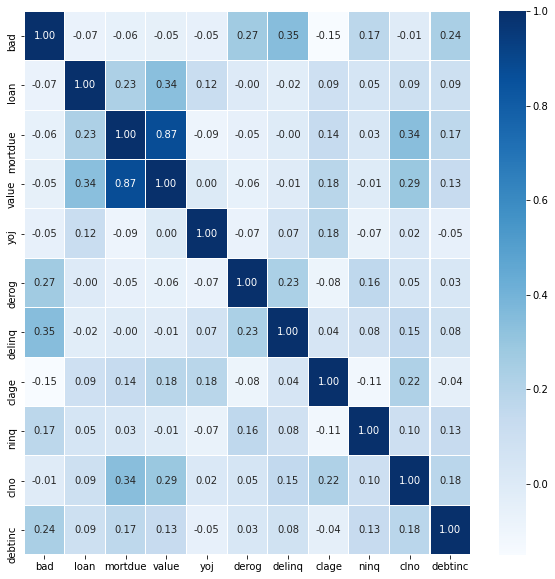

In [306]:
data_visualization.correlation()


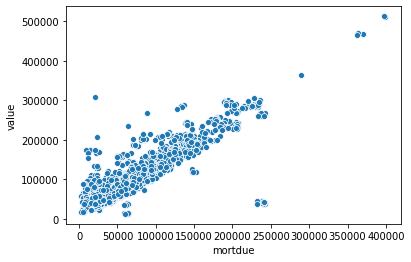

In [307]:
data_visualization.scatter_plot(x="mortdue",y="value")


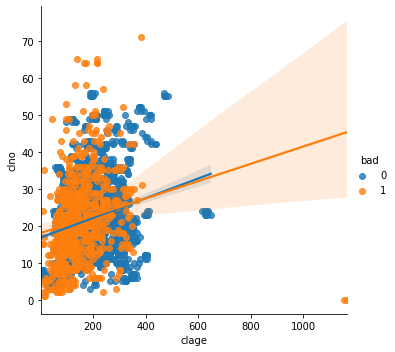

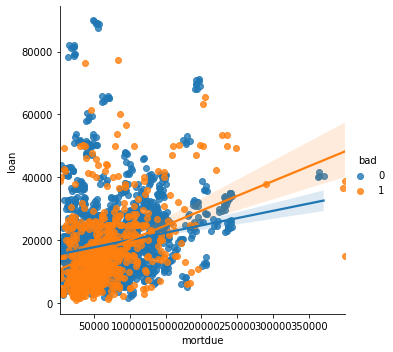

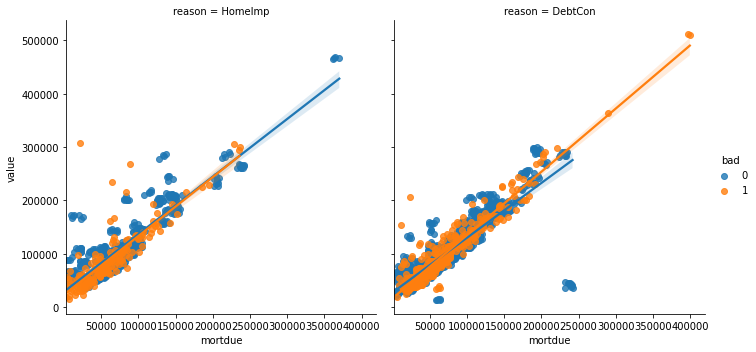

In [308]:
data_visualization.lm_plot(x="clage", y="clno", z="bad")
data_visualization.lm_plot(x="mortdue", y="loan", z="bad")
data_visualization.lm_plot(x="mortdue", y="value", z="bad",w= "reason")

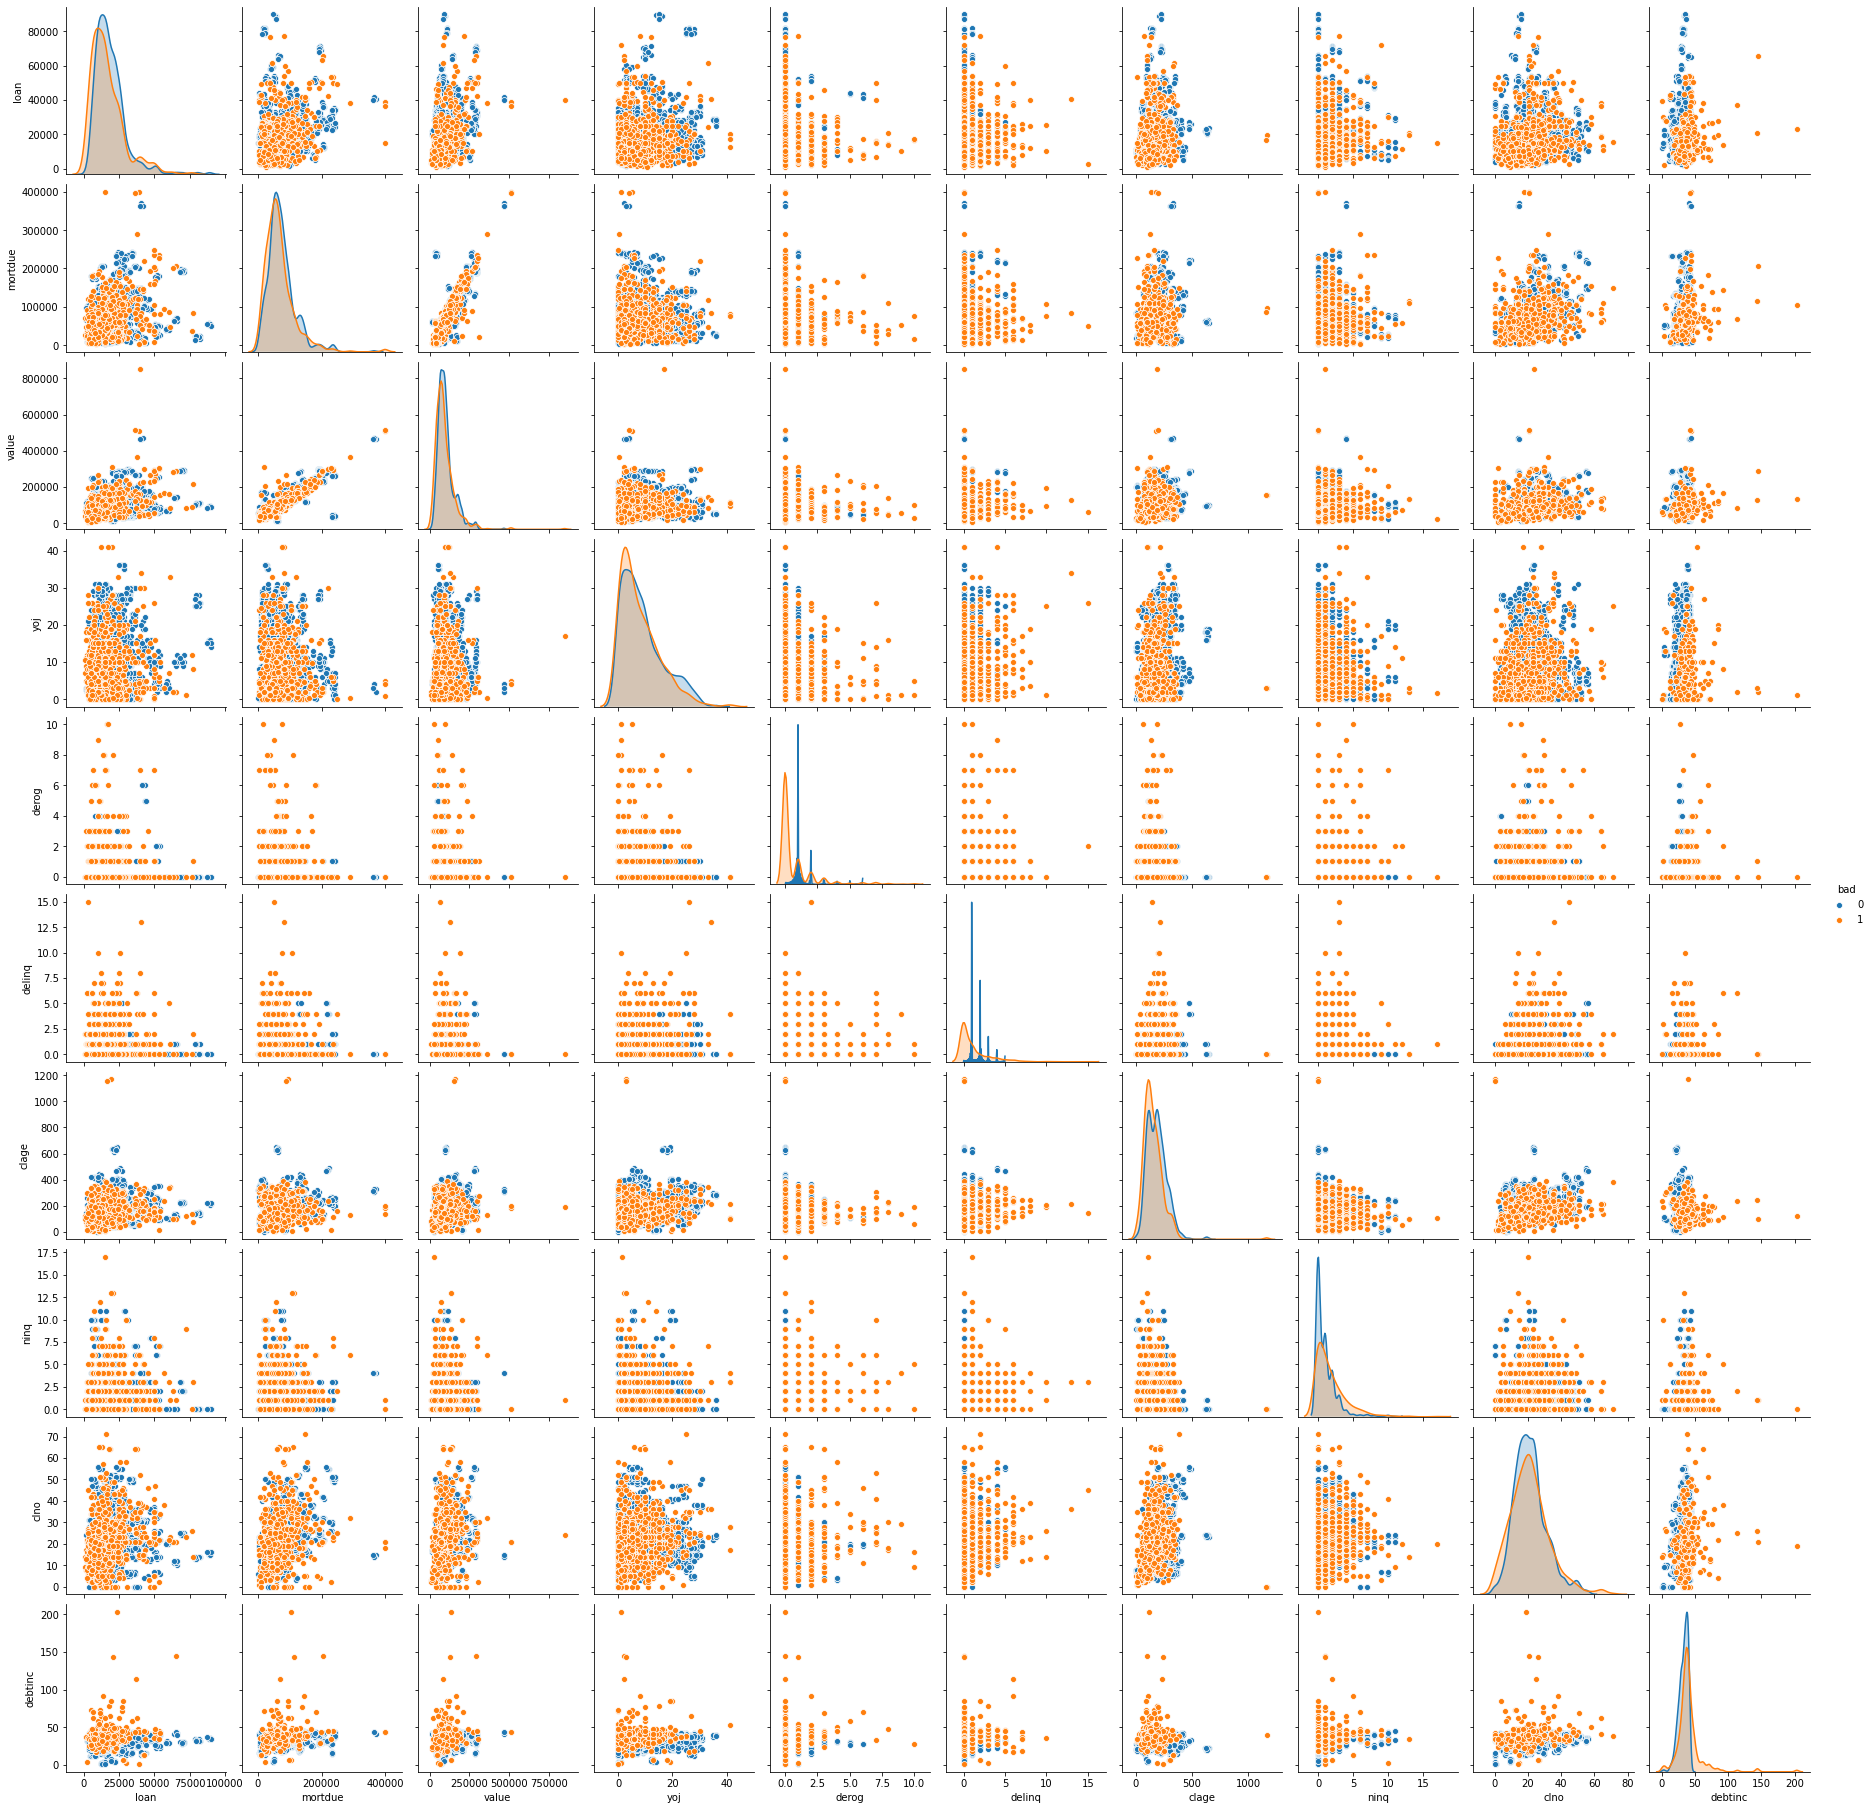

In [309]:
data_visualization.pair_plot(z="bad")


In [310]:

hypothesis_testing=HypothesisTesting(data)
hypothesis_testing.normality_assumption()

Statistics:0.489, p=0.000 
bad  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.849, p=0.000 
loan  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.882, p=0.000 
mortdue  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.848, p=0.000 
value  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.904, p=0.000 
yoj  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.338, p=0.000 
derog  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.450, p=0.000 
delinq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.920, p=0.000 
clage  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.691, p=0.000 
ninq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.966, p=0.000 
clno  için Orneklem Normal (Gaussian) Dagilimdan 

In [311]:
hypothesis_testing.normality_assumption()



Statistics:0.489, p=0.000 
bad  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.849, p=0.000 
loan  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.882, p=0.000 
mortdue  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.848, p=0.000 
value  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.904, p=0.000 
yoj  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.338, p=0.000 
derog  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.450, p=0.000 
delinq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.920, p=0.000 
clage  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.691, p=0.000 
ninq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.966, p=0.000 
clno  için Orneklem Normal (Gaussian) Dagilimdan 

In [312]:
hypothesis_testing.assumption_of_variance_homogeneity(variable="bad",x=1,y=0)


Statistics:nan, p=nan 
bad 0  için varyans homojen degildir. (reject H0)
Statistics:nan, p=nan 
bad 1  için varyans homojen degildir. (reject H0)
Statistics:6.343, p=0.012 
loan 0  için varyans homojen degildir. (reject H0)
Statistics:6.343, p=0.012 
loan 1  için varyans homojen degildir. (reject H0)
Statistics:0.635, p=0.426 
mortdue 0  için varyans homojendir. (Fail to Reject H0)
Statistics:0.635, p=0.426 
mortdue 1  için varyans homojendir. (Fail to Reject H0)
Statistics:5.362, p=0.021 
value 0  için varyans homojen degildir. (reject H0)
Statistics:5.362, p=0.021 
value 1  için varyans homojen degildir. (reject H0)
Statistics:2.667, p=0.103 
yoj 0  için varyans homojendir. (Fail to Reject H0)
Statistics:2.667, p=0.103 
yoj 1  için varyans homojendir. (Fail to Reject H0)
Statistics:249.398, p=0.000 
derog 0  için varyans homojen degildir. (reject H0)
Statistics:249.398, p=0.000 
derog 1  için varyans homojen degildir. (reject H0)
Statistics:437.018, p=0.000 
delinq 0  için varyans ho

In [313]:
hypothesis_testing.two_independent_samples_t_test(variable="bad",x=1,y=0)


ttest_ind: i=bad t = inf  p = 0
bad  ile  bad  değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)
ttest_ind: i=loan t = -4.08894  p = 4.66915e-05
loan  ile  bad  değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)
ttest_ind: i=mortdue t = -3.01992  p = 0.00259833
mortdue  ile  bad  değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)
ttest_ind: i=value t = -2.58147  p = 0.0100048
value  ile  bad  değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)
ttest_ind: i=yoj t = -3.02939  p = 0.00250839
yoj  ile  bad  değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)
ttest_ind: i=derog t = 9.73963  p = 4.05637e-21
derog  ile  bad  değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)
ttest_ind: i=delinq t = 12.8052  p = 6.17032e-34
delinq  ile  bad  değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)
ttest_ind: i=clage t = -8.39387

In [314]:
hypothesis_testing.chi_square_t_test(x="bad",y="job")


Chi-Square Test =48.1495 p=3.31092e-09
bad ve job  degiskenleri birbirinden bağımsız değildir(reject H0)
*****************************************************************************************


In [315]:
# Sınıflandırma Algoritmaları

## Logistic Regression

In [316]:
# veri setinden na değerleri atıldı
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [317]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()


,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [318]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)

In [320]:
info= Information(data)
info.print_shape()

X_train shape (1452, 16)
y_train shape (1452,)
X_test shape (566, 16)
y_test shape  (566,)


In [321]:
grid_loj=GridSearchHelper(data)
grid_loj.logistic_regresyon(X_train,y_train,solver="liblinear")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
# stats model ile modelleme
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()
# p değerinin 0.05 den küçük olan değerler bizim için y yi aciklama da anlam ifade etmektedir.

Optimization terminated successfully.
         Current function value: 0.265857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1452
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           15
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        11:20:32   Log-Likelihood:                -386.02
converged:                       True   LL-Null:                       -440.02
Covariance Type:            nonrobust   LLR p-value:                 3.897e-16
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -2.35e-05   1.21e-05     -1.947      0.051   -4.72e-05    1.52e-07
mortdue          1.39e-06   5.19e-06      0.268      0.789   -8.78e-06    1.16e-05
value          -8.748e-07   4.35e-06     -0.201      0.841    -9.4e-06    7.65e-06
yoj               -0.0436      0.015     -2.882      0.004      -0.073      -0.014
derog              0.5213      0.151      3.457      0.001       0.226       0.817
delinq             0.7968      0.104      7.673      0.000       0.593       1.000
clage             -0.0072      0.002     -4.743      0.000      -0.010      -0.004
ninq               0.0592      0.054      1.102      0.270      -0.046       0.165
clno              -0.0412      0.012     -3.347      0.001      -0.065      -0.017
debtinc            0.0121      0.008      1.532      0.125      -0.003       0.028
reason_DebtCon    -0.4239      0.203     -2.085      0.037      -0.822      -0.026
job_Mgr            0.0214      0.290      0.074      0.941      -0.546       0.589
job_Office        -0.5584      0.317     -1.762      0.078      -1.179       0.063
job_ProfEx        -0.1511      0.278     -0.543      0.587      -0.697       0.395
job_Sales          0.6057      0.710      0.853      0.394      -0.787       1.998
job_Self           1.0791      0.530      2.035      0.042       0.040       2.118
==================================================================================
"""

In [323]:
preproses= PreprocessStrategy(data)
preproses.discarding_pvalue(X_train,X_test)

(       yoj  derog  delinq   clage  clno  reason_DebtCon  job_Self
 2751   3.0    2.0     0.0  162.95  23.0               0         0
 2456   2.0    1.0     0.0  238.21  32.0               1         0
 2445   6.0    0.0     0.0  254.06  16.0               1         0
 2145   2.0    0.0     0.0   68.35  22.0               1         0
 1053   1.0    0.0     0.0  190.65  17.0               1         0
 ...    ...    ...     ...     ...   ...             ...       ...
 1577  15.0    0.0     0.0  212.28  15.0               1         0
 2132   9.0    0.0     0.0  212.54  19.0               0         0
 1299  25.0    0.0     0.0  124.56  11.0               1         0
 2301  22.0    0.0     0.0  185.36  22.0               1         0
 1573   2.0    0.0     0.0  275.52  42.0               1         0
 
 [1452 rows x 7 columns],
        yoj  derog  delinq   clage  clno  reason_DebtCon  job_Self
 2400   0.0    1.0     0.0  187.14  37.0               1         0
 800    6.0    0.0     0.0  212.60

In [324]:
# Modelin kurulması
grid_loj=GridSearchHelper(data)
loj_model=grid_loj.logistic_regresyon(X_train,y_train,solver="liblinear")

In [325]:
katsayı= GridSearchHelper(data)
katsayı.coefficiant(model_name=loj_model)

Sabit katsayı:  [-6.79531498e-05]
katsayılar : [[-3.29434573e-05 -7.20868952e-07 -1.93492872e-06 -7.64290303e-04
   1.02153727e-04  2.21876553e-04 -7.99289595e-03  6.32235125e-05
  -8.05197684e-04 -6.53683769e-05 -3.61391390e-05  1.54046451e-06
  -2.24342352e-05 -1.47191690e-05  2.77268086e-06  1.05839016e-05]]


In [326]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=loj_model,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566

Accuracy Score  0.9169611307420494
Confusion Matrix [[519   0]
 [ 47   0]]
logit_roc_auc 0.5


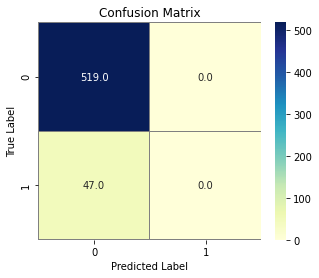

In [327]:
y_pred = loj_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [328]:
loj_model.predict_proba(X_test)[0:10]
# 0 olma ve 1 olma ihtimallerini(olasılıgını) veriyor
#sağ 1 olma ihtimali 
#sol  ise 0 olma ihtimalidir
# threshold=0.5 için ayarlanmıştır

array([[0.93864532, 0.06135468],
       [0.94575653, 0.05424347],
       [0.90255438, 0.09744562],
       [0.96564073, 0.03435927],
       [0.81812471, 0.18187529],
       [0.74549129, 0.25450871],
       [0.79643268, 0.20356732],
       [0.946065  , 0.053935  ],
       [0.99255079, 0.00744921],
       [0.93852515, 0.06147485]])

In [329]:
y[0:10]# gerçek y değerleri

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [330]:
# gerçek y değerlerim ile yukarıdaki tahmin değerleri  ile kıyaslamak için;
y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
# değerlerin 1 olma olasılıkları

array([0.06135468, 0.05424347, 0.09744562, 0.03435927, 0.18187529,
       0.25450871, 0.20356732, 0.053935  , 0.00744921, 0.06147485])

In [331]:
# threshold değerini değiştirerek tahmini gerçekleştirebiliriz
y_pred = [1 if i > 0.6 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [332]:
#roc curve ün 1e yakın olmasını gerekiyor.
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
logit_roc_auc

0.5

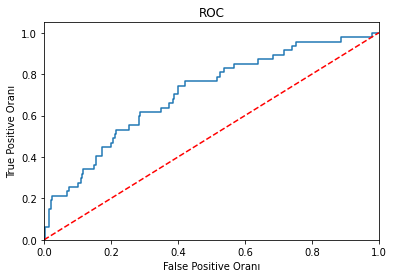

In [339]:
visu=Visualizer(data)
visu.plot_roc_curve(model_adı=loj_model,X_test=X_test)

# Decision Tree Classifier

In [340]:
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [341]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()


,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [342]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
info= Information(data)
info.print_shape()

X_train shape (1452, 16)
y_train shape (1452,)
X_test shape (566, 16)
y_test shape  (566,)


In [ ]:
# Hiç bir değişkeni atmadan decision tree classifier algoritmasını denedim.

In [349]:
# Modelin kurulması
grid_decision_tree=GridSearchHelper(data)
cart_model=grid_decision_tree.decision_tree(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [354]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=cart_model,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       0.97      0.96      0.96       519
           1       0.60      0.62      0.61        47

    accuracy                           0.93       566
   macro avg       0.78      0.79      0.79       566
weighted avg       0.94      0.93      0.93       566

Accuracy Score  0.9346289752650176
roc_auc 0.790206206698643


In [368]:
# model tuning
model_tuning=GridSearchHelper(data)
cart_tuned=model_tuning.decision_tree_model_tuning(X_train,y_train)

Fitting 10 folds for each of 234 candidates, totalling 2340 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.4s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


[Parallel(n_jobs=-1)]: Done 2340 out of 2340 | elapsed:   16.9s finished


In [369]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=cart_tuned,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       0.96      0.99      0.97       519
           1       0.77      0.51      0.62        47

    accuracy                           0.95       566
   macro avg       0.87      0.75      0.79       566
weighted avg       0.94      0.95      0.94       566

Accuracy Score  0.9469964664310954
roc_auc 0.7485754109785593


|--- feature_9 <= 43.70
|   |--- feature_5 <= 1.50
|   |   |--- feature_6 <= 172.28
|   |   |   |--- feature_0 <= 10050.00
|   |   |   |   |--- feature_1 <= 41062.50
|   |   |   |   |   |--- feature_6 <= 65.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  65.56
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  41062.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  10050.00
|   |   |   |   |--- feature_7 <= 3.50
|   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_15 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  3.50
|   |   |   |   |   |--- feature_9 <= 38.95
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_9 >  38.95
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature

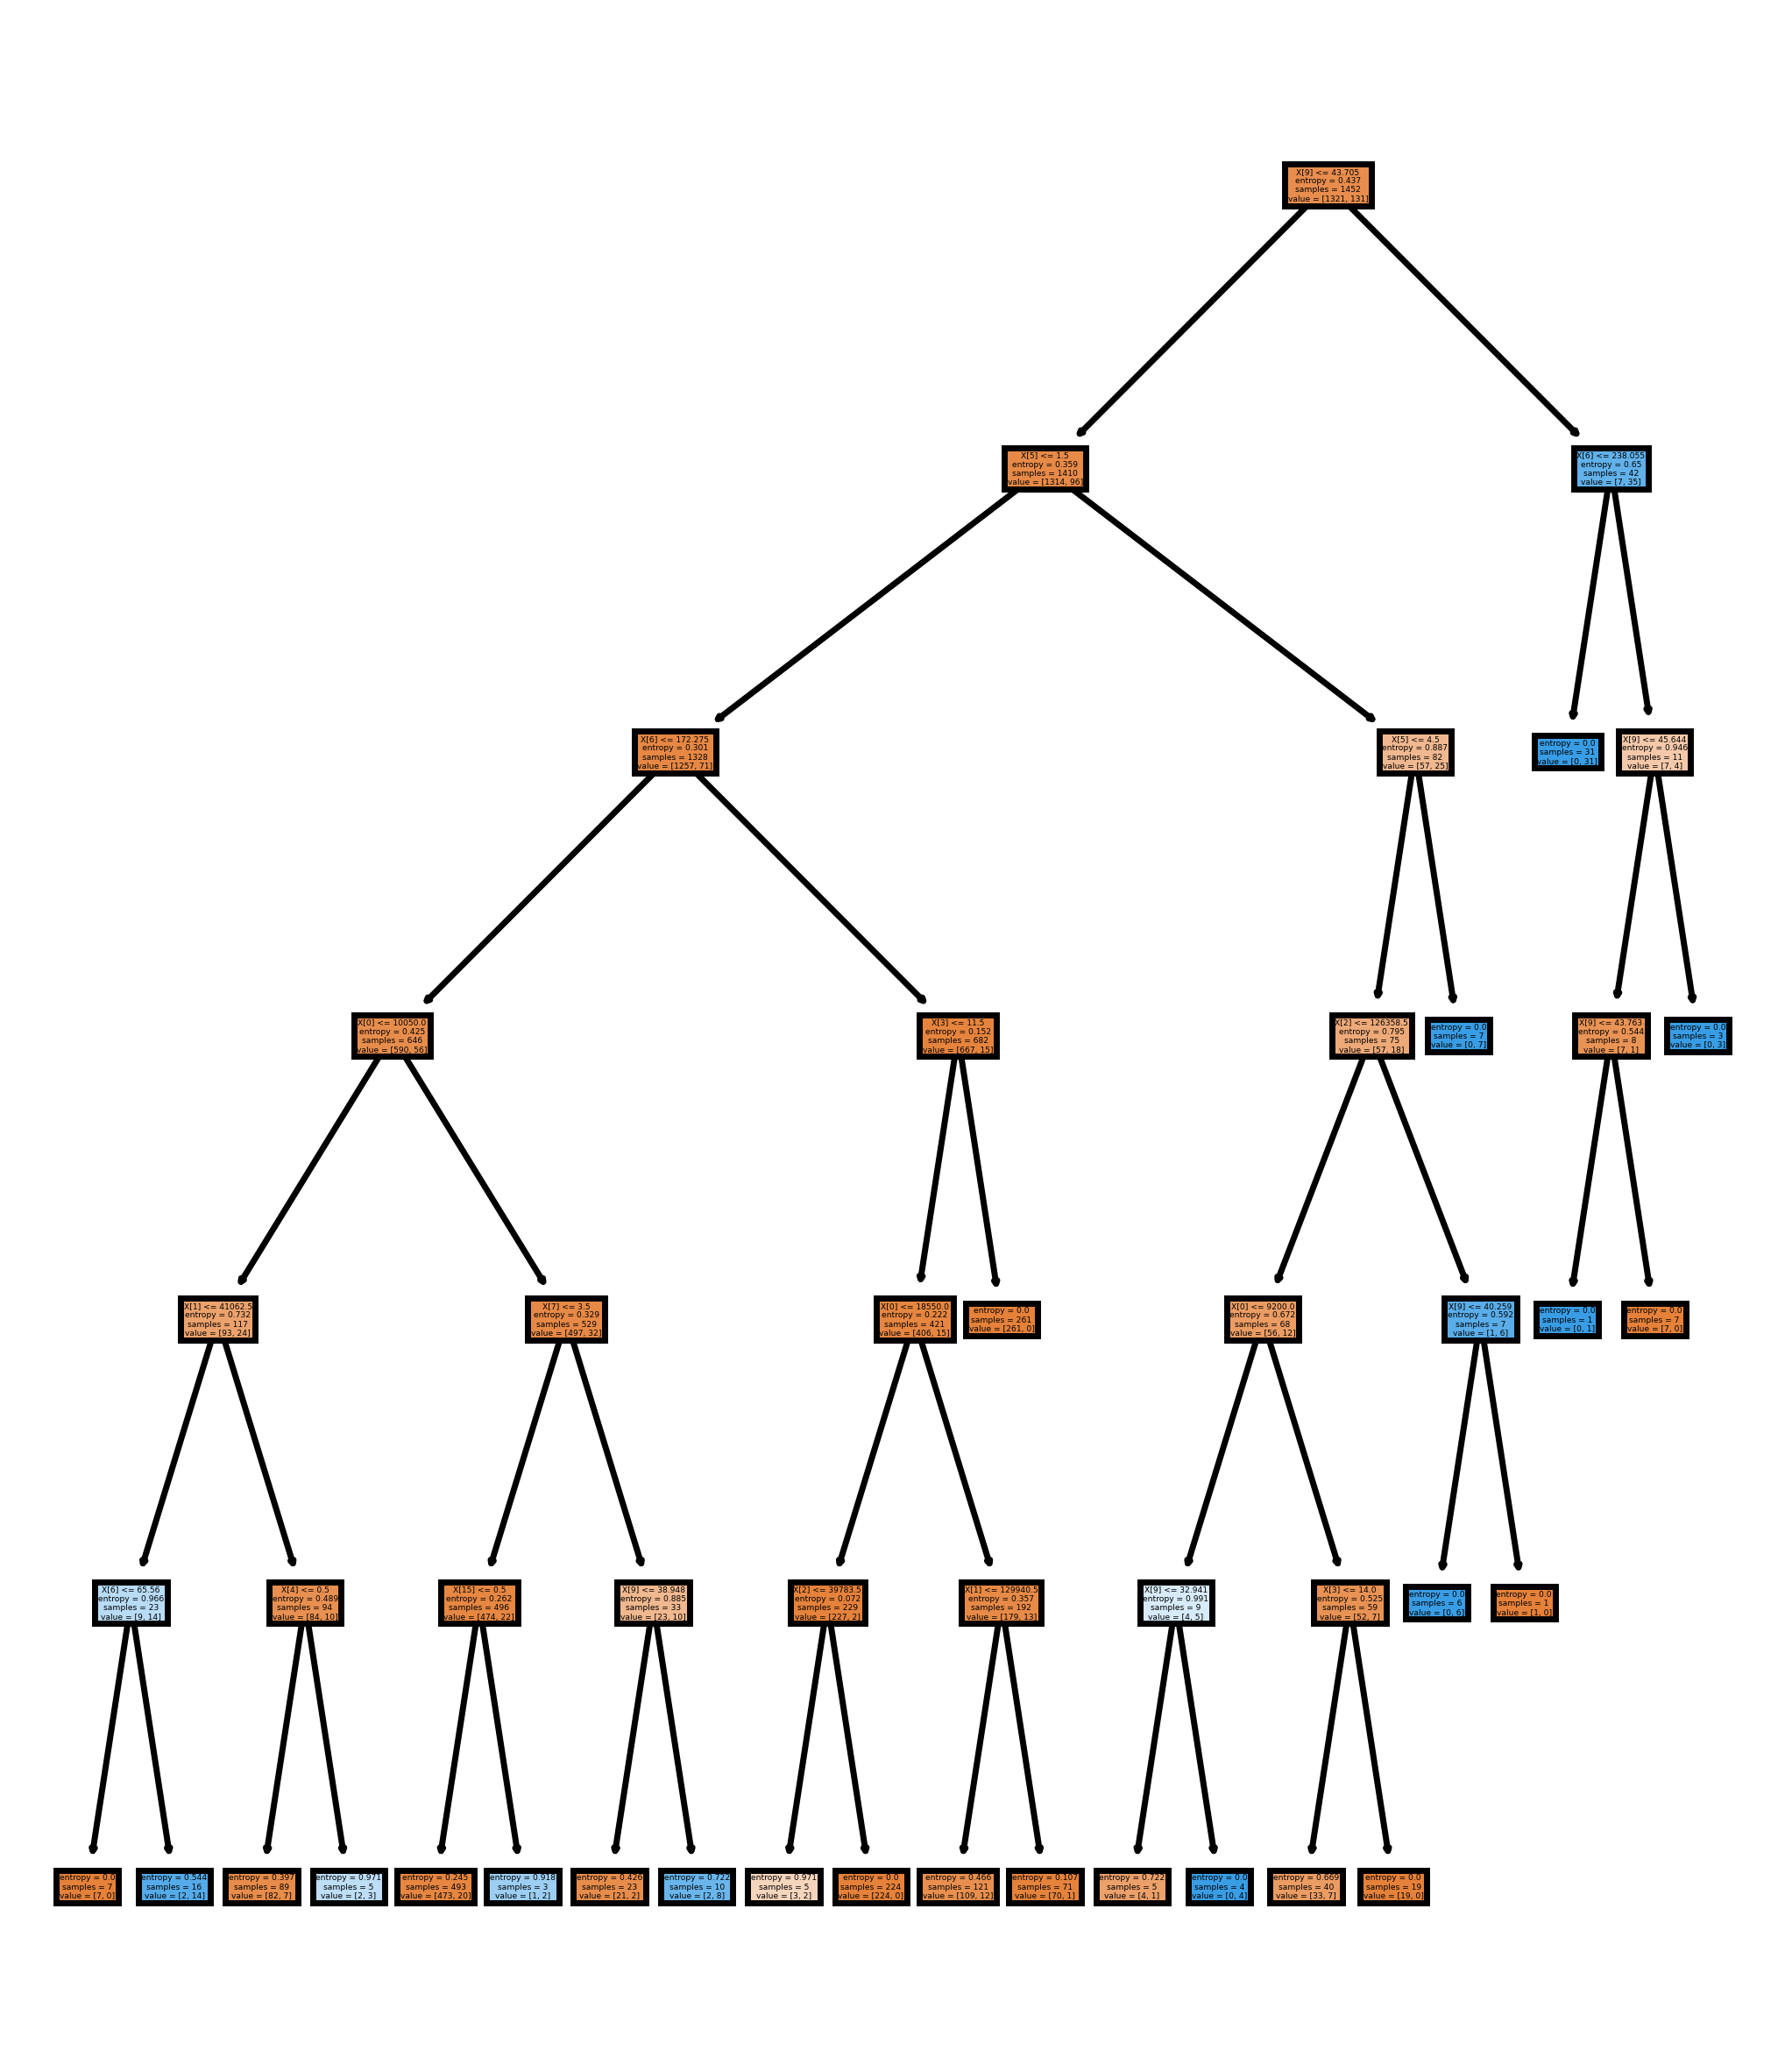

In [370]:
visu=Visualizer(data)
visu.plot_tree(model_name=cart_tuned)

# Random Forest Classification 

In [385]:
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [386]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [387]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)


In [389]:
info= Information(data)
info.print_shape()

X_train shape (1452, 16)
y_train shape (1452,)
X_test shape (566, 16)
y_test shape  (566,)


In [390]:
grid_random_forest_tree=GridSearchHelper(data)
rf_model=grid_random_forest_tree.random_forest(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [391]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=rf_model,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       519
           1       1.00      0.51      0.68        47

    accuracy                           0.96       566
   macro avg       0.98      0.76      0.83       566
weighted avg       0.96      0.96      0.95       566

Accuracy Score  0.9593639575971732
roc_auc 0.7553191489361701


In [392]:
# Model Tuning 

In [393]:
model_tuning=GridSearchHelper(data)
rf_tuned=model_tuning.random_forest_model_tuning(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  8.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [394]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=rf_tuned,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       0.95      1.00      0.98       519
           1       1.00      0.45      0.62        47

    accuracy                           0.95       566
   macro avg       0.98      0.72      0.80       566
weighted avg       0.96      0.95      0.95       566

Accuracy Score  0.9540636042402827
roc_auc 0.7234042553191489


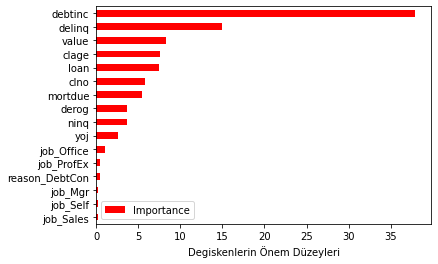

In [396]:
visu=Visualizer(data)
visu.degisken_onem_görsellestirme(model_name=rf_tuned,X_train=X_train)

# Neural Network (Classification)

In [407]:
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [408]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [409]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)


(1452, 16)
(1452,)
(566, 16)
(566,)


In [410]:
info= Information(data)
info.print_shape()

X_train shape (1452, 16)
y_train shape (1452,)
X_test shape (566, 16)
y_test shape  (566,)


In [411]:
scaler=StandardScaler()

In [412]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [413]:
X_train_scaled[0:2]


array([[-1.1727471 , -0.11618344, -0.64160222, -0.80110944,  3.37508722,
        -0.32773572, -0.20397275, -0.65996532,  0.05958211,  0.69494165,
        -1.57279503, -0.40083845, -0.43831293, -0.58583337,  8.25486869,
        -0.18087821],
       [ 1.60101229,  2.90412576,  2.93054431, -0.932205  ,  1.55261543,
        -0.32773572,  0.67725196, -0.65996532,  1.00680723, -0.29989362,
         0.63581076, -0.40083845, -0.43831293,  1.70697001, -0.12114063,
        -0.18087821]])

In [415]:
grid_neural_network=GridSearchHelper(data)
mlpc=grid_neural_network.neural_network(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [416]:
mlpc.coefs_


[array([[ 0.40297113,  0.29932367, -0.37723799, ..., -0.05383709,
          0.41955886,  0.24869878],
        [ 0.07085655, -0.11815041,  0.1836318 , ...,  0.1639248 ,
          0.13809388, -0.09286065],
        [ 0.20296627,  0.15405327,  0.31343531, ..., -0.37548763,
         -0.25619889, -0.05900766],
        ...,
        [-0.09684381, -0.56517105, -0.06673147, ..., -0.19758553,
          0.05674907, -0.09890703],
        [-0.25966656,  0.14687546,  0.20126284, ..., -0.26592863,
         -0.30511441,  0.05917746],
        [ 0.23905069,  0.1901217 , -0.26006833, ...,  0.22668499,
         -0.21736835, -0.00227458]]), array([[-0.25768767],
        [-0.41034691],
        [-0.3739499 ],
        [ 0.28292877],
        [-0.30545251],
        [-0.26401379],
        [ 0.37706818],
        [-0.39226019],
        [-0.29876922],
        [ 0.41166705],
        [-0.36207781],
        [-0.41773657],
        [-0.38118321],
        [-0.54894217],
        [-0.42710474],
        [-0.36874354],
      

In [417]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=mlpc,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       1.00      0.01      0.01       519
           1       0.08      1.00      0.15        47

    accuracy                           0.09       566
   macro avg       0.54      0.50      0.08       566
weighted avg       0.92      0.09      0.02       566

Accuracy Score  0.08833922261484099
roc_auc 0.5028901734104047


In [420]:
# model tuning 
model_tuning=GridSearchHelper(data)
neural_network_tuned=model_tuning.neural_network_model_tuning(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  9.2min finished


MLPClassifier(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [421]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=neural_network_tuned,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       1.00      0.02      0.03       519
           1       0.08      1.00      0.16        47

    accuracy                           0.10       566
   macro avg       0.54      0.51      0.09       566
weighted avg       0.92      0.10      0.04       566

Accuracy Score  0.09717314487632508
roc_auc 0.5077071290944124


# Support Vector Classifier

In [425]:
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [426]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [427]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [428]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)


In [429]:
info= Information(data)
info.print_shape()

X_train shape (1452, 16)
y_train shape (1452,)
X_test shape (566, 16)
y_test shape  (566,)


In [433]:
grid_svm=GridSearchHelper(data)
svm_model=grid_svm.support_vektor_machine(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [434]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=svm_model,X_test=X_test)

Classification Report               precision    recall  f1-score   support

           0       0.92      1.00      0.96       519
           1       0.00      0.00      0.00        47

    accuracy                           0.92       566
   macro avg       0.46      0.50      0.48       566
weighted avg       0.84      0.92      0.88       566

Accuracy Score  0.9169611307420494
roc_auc 0.5


In [436]:
# model tuning svm
model_tuning=GridSearchHelper(data)
svm_tuned=model_tuning.svc_model_tuning(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=svm_model,X_test=X_test)

In [ ]:
# Gaussian NaiveBayes (Classification)

In [ ]:
df=data.copy()
df=df.dropna()
df.head()

In [ ]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

In [ ]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
info= Information(data)
info.print_shape()

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:
gaussian_naive_bayes
grid_svm=GridSearchHelper(data)
gausian_naive_bayes_model=grid_svm.gaussian_naive_bayes(X_train,y_train)

In [ ]:
gausian_naive_bayes_model.predict_proba(X_test)[0:10]# sınıfların olasılık degerleri

array([[0.98963159, 0.01036841],
       [0.95812052, 0.04187948],
       [0.98719469, 0.01280531],
       [0.98387972, 0.01612028],
       [0.99665449, 0.00334551],
       [0.97490409, 0.02509591],
       [0.98651082, 0.01348918],
       [0.9746092 , 0.0253908 ],
       [0.40149679, 0.59850321],
       [0.99492648, 0.00507352]])

In [ ]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=gausian_naive_bayes_model,X_test=X_test)

In [ ]:
# Multinominal Naive Bayes

In [ ]:
df=data.copy()
df=df.dropna()
df.head()

In [ ]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

In [ ]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
info= Information(data)
info.print_shape()

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:

grid_multinominal=GridSearchHelper(data)
multinominal_model=grid_multinominal.multinominal_naive_bayes(X_train,y_train)

In [ ]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=multinominal_model,X_test=X_test)

In [ ]:
# XGBoost (Classification) 

In [ ]:
df=data.copy()
df=df.dropna()
df.head()

In [ ]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

In [ ]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
info= Information(data)
info.print_shape()

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:

xgboost=GridSearchHelper(data)
xgb_model=xgboost.XGBoost(X_train,y_train)

In [ ]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=xgb_model,X_test=X_test)

In [ ]:
# model tuning 

In [ ]:
model_tuning=GridSearchHelper(data)
xgb_tuned=model_tuning.xgb_model_tuning(X_train,y_train)

In [ ]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=xgb_tuned,X_test=X_test)

In [ ]:
# KNN 

In [ ]:
df=data.copy()
df=df.dropna()
df.head()

In [ ]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()

In [ ]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)
info= Information(data)
info.print_shape()

(1452, 16)
(1452,)
(566, 16)
(566,)


In [ ]:

knn=GridSearchHelper(data)
knn_model=knn.knn(X_train,y_train)

In [ ]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=knn_model,X_test=X_test)

In [ ]:

model_tuning=GridSearchHelper(data)
knn_tuned=model_tuning.knn_model_tuning(X_train,y_train)

In [ ]:
estimate=GridSearchHelper(data)
estimate.fit_predict_and_show_result(model_name=knn_tuned,X_test=X_test)

In [ ]:
# Tüm Sonuçların Karşılaştırılması

In [ ]:
modeller=[linear_model,
          pca_model,
          loj_model,
          cart_model,
          rf_model,
          cart_tuned,
          rf_tuned,
          mlpc_model,
          mlpc_tuned,
          svc_model,
          svc_tuned,
          nb_model,
          mnb_model,
          xgb_model,
          xgb_tuned,
          knn_model,
          knn_tuned]

for model in modeller:
    isimler=model.__class__.__name__
    y_pred=model.predict(X_test)
    dogruluk=accuracy_score(y_test,y_pred)
    print("_" *28)
    print(isimler +":")
    print("Accuracy:{:.4%}".format(dogruluk))